IRIS DATASET EDA AND CLASSIFICATION USING LOGISTIC REGRESSION/RANDOM FOREST/KNN/NAIVE BAYES/SVC/XGBOOST

In [1]:
import numpy as np #numpy is used for numeric operations
import pandas as pd# Pandas is just like SQL , It is used for Data manipulation
import matplotlib.pyplot as plt #For Plots

df = pd.read_csv(r'D:\Datasets\iris-species\Iris.csv') # Import the dataset

In [5]:
df.head() #Shows top 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
df.describe() #Univariare Statistics 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()
#To check the class bias present in target variable and it is zero here which can be visualized in the bar plot below

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

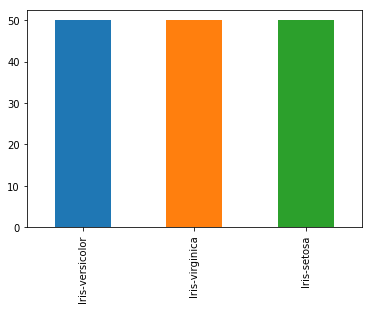

In [8]:
df['Species'].value_counts().plot.bar() #Frequency distribution for targer variable "Species"

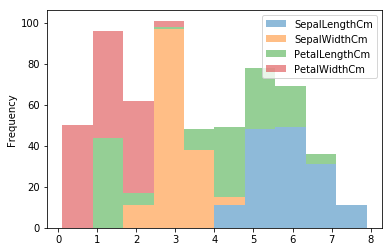

In [14]:
 df.iloc[:,1:5].plot.hist(stacked='False',alpha=0.5) #Unstacked histogram distribution for numeric continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1134D20B8>,
      dtype=object)

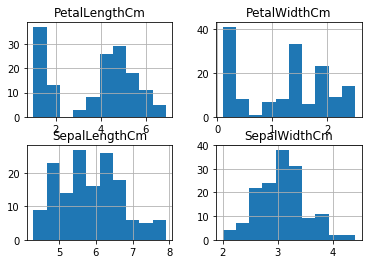

In [15]:
df.iloc[:,1:5].hist() #Frequency distribution of each continuous feature present in Iris dataset shown via histogram

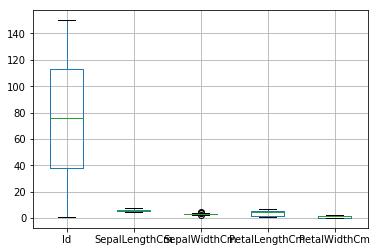

In [16]:
df.boxplot()

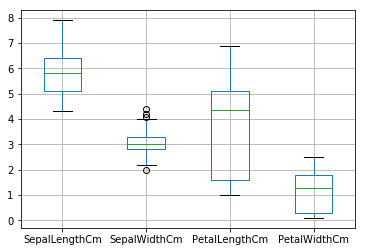

In [19]:
df.iloc[:,1:].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B115506710>,
      dtype=object)

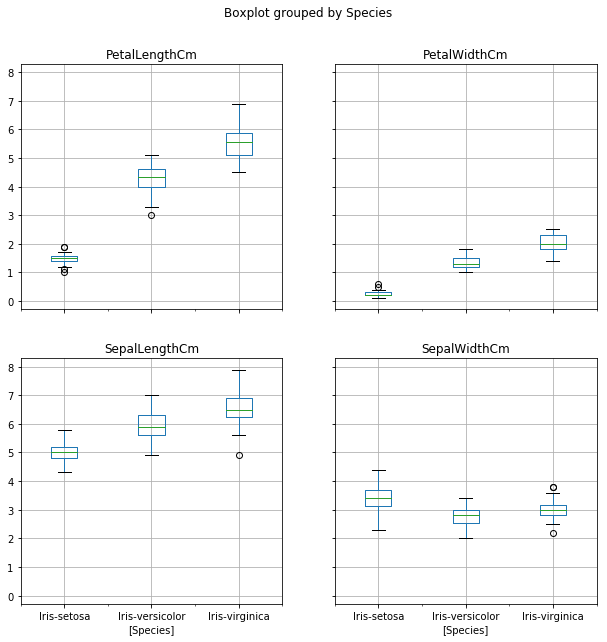

In [24]:
plt.rcParams['figure.figsize'] = [10, 10] #to control the plot size
df.iloc[:,1:].boxplot(by='Species') #Box plot grouped by species

In [25]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

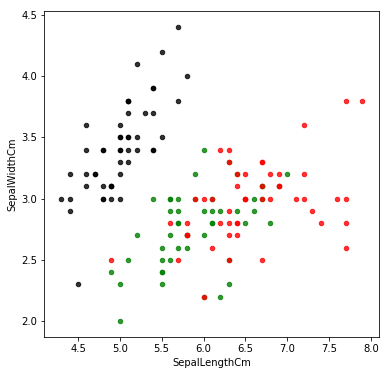

In [29]:
plt.rcParams['figure.figsize'] = [6,6] #to control the plot size
fig = df[df['Species']=='Iris-versicolor'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',c='green',alpha=0.8)
df[df['Species']=='Iris-virginica'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',c='red',alpha=0.8,ax=fig)
df[df['Species']=='Iris-setosa'].plot.scatter(x='SepalLengthCm',y='SepalWidthCm',c='black',alpha=0.8,ax=fig)

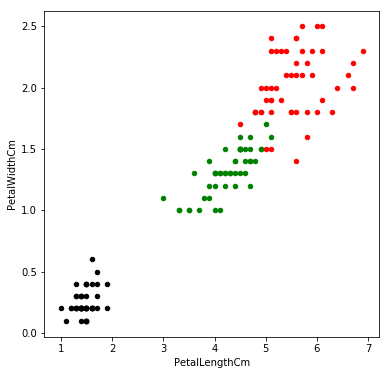

In [31]:
plt.rcParams['figure.figsize'] = [6,6] #to control the plot size
fig = df[df['Species']=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',c='green',alpha=1)
df[df['Species']=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',c='red',alpha=1,ax=fig)
df[df['Species']=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',c='black',alpha=1,ax=fig)

It is clearly evident that the features PetalWidthCm and PetalLengthCm are highly correlated and the Iris flower species can be clearly distinguished or classified if we use PetalWidthCm and PetalLengthCm as features

Now let's start modelling.

In [32]:
#Check for Presence of Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The result say no null values in the dataset

In [33]:
#Check for skewness in the numeric columns
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

There is not much skewness present in the dataset but the distribution is not gaussian which can be seen below

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B117433FD0>,
      dtype=object)

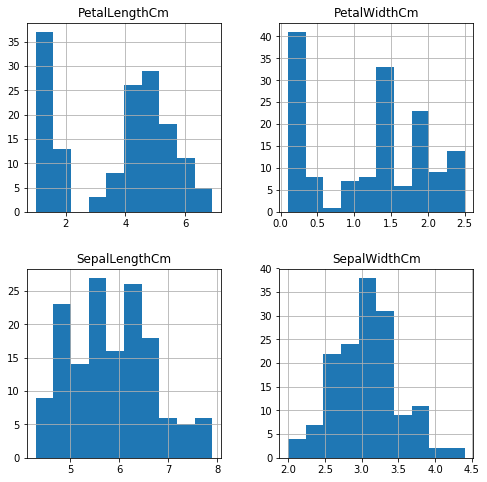

In [37]:
plt.rcParams['figure.figsize'] = [8,8]
df.iloc[:,1:].hist()

When the features do not follow a gaussian distribution it is better to use non-parametric methods for classification

In [51]:
x = df.iloc[:,1:5]
y = df.iloc[:,5]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

from sklearn.linear_model import LogisticRegression #logistic Regression
model = LogisticRegression(random_state=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [52]:
model = LogisticRegression(random_state=3)

In [53]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
print(accuracy_score(y_pred,y_test))

0.9333333333333333


In [59]:
print("Classification_Report",classification_report(y_pred,y_test))

Classification_Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

    avg / total       0.93      0.93      0.93        30



In [60]:
print("confusion_matrix",classification_report(y_pred,y_test))

confusion_matrix                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

    avg / total       0.93      0.93      0.93        30



In [65]:
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))
    

Accuracy Score is : 0.9666666666666667
Classification_Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30

confusion_matrix
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30



In [66]:
from sklearn.naive_bayes import GaussianNB  #Naive Bayes Algorithm
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))
    

Accuracy Score is : 0.9666666666666667
Classification_Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30

confusion_matrix
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30



In [72]:
from sklearn.neighbors import KNeighborsClassifier  #KNN Alogorthm
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))

Accuracy Score is : 0.9666666666666667
Classification_Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30

confusion_matrix
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30



In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))

In [76]:
from sklearn.svm import SVC 
model = SVC(C=1.0,kernel='rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))

Accuracy Score is : 0.9666666666666667
Classification_Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30

confusion_matrix
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

    avg / total       0.97      0.97      0.97        30



In [78]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",classification_report(y_pred,y_test))

Accuracy Score is : 1.0
Classification_Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        30

confusion_matrix
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        30

